### 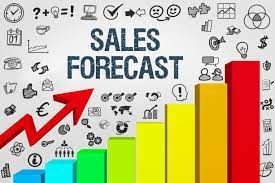

# SALES PREDICTION USING PYTHON

### importing libreries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [66]:
df=pd.read_csv("C:\\Users\\ayith\\OneDrive\\Documents\\data sets\\Advertising.csv")    #reading the csv file

### data checking

In [67]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


### Data cleaning

In [13]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [40]:
df.shape

(200, 4)

In [17]:
df.duplicated().sum()

0

### Data graphs

In [22]:
num_features=df.columns

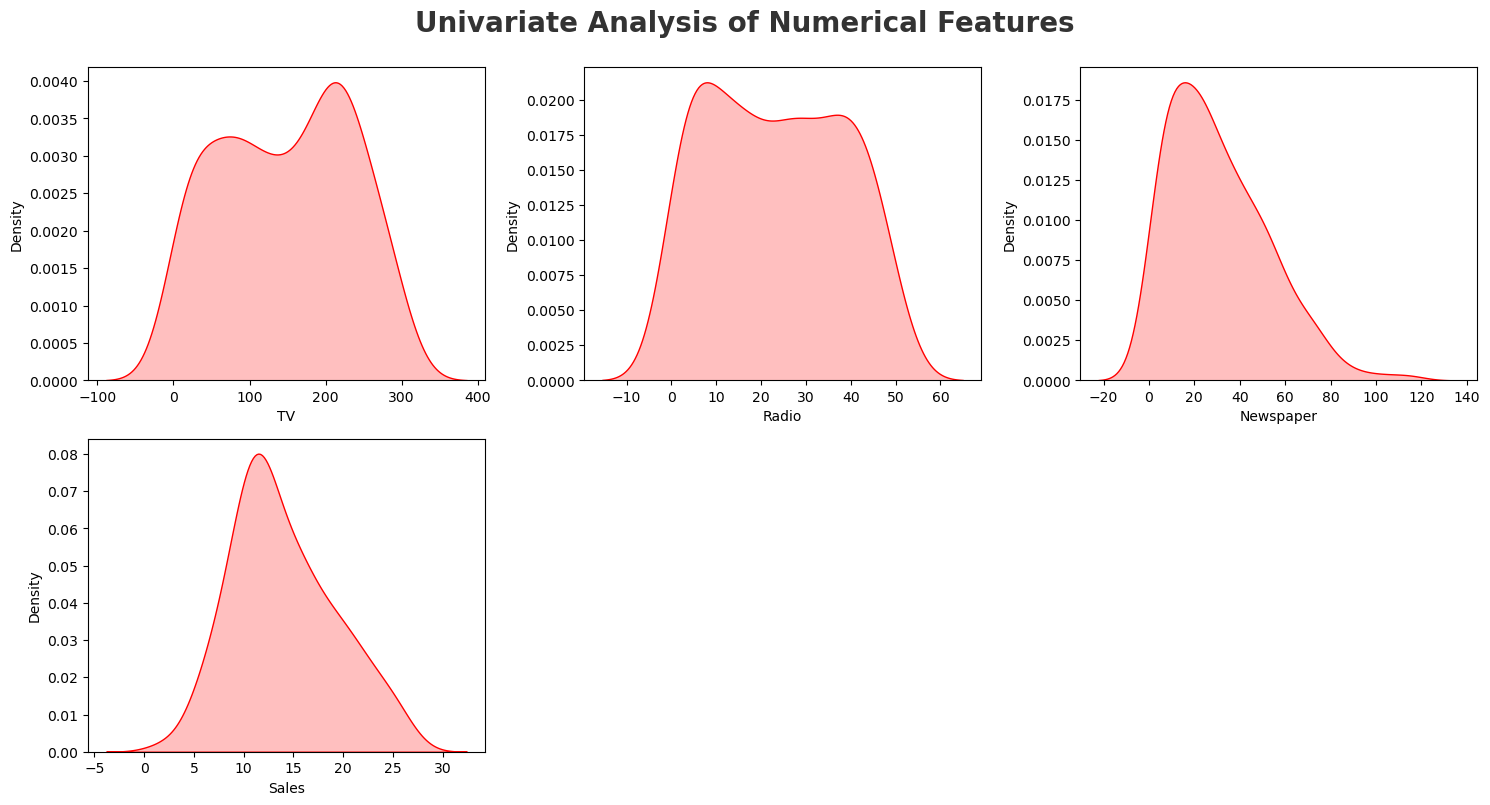

In [24]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[num_features[i]],shade=True, color='r')
    plt.xlabel(num_features[i])
    plt.tight_layout()

### checking outliers

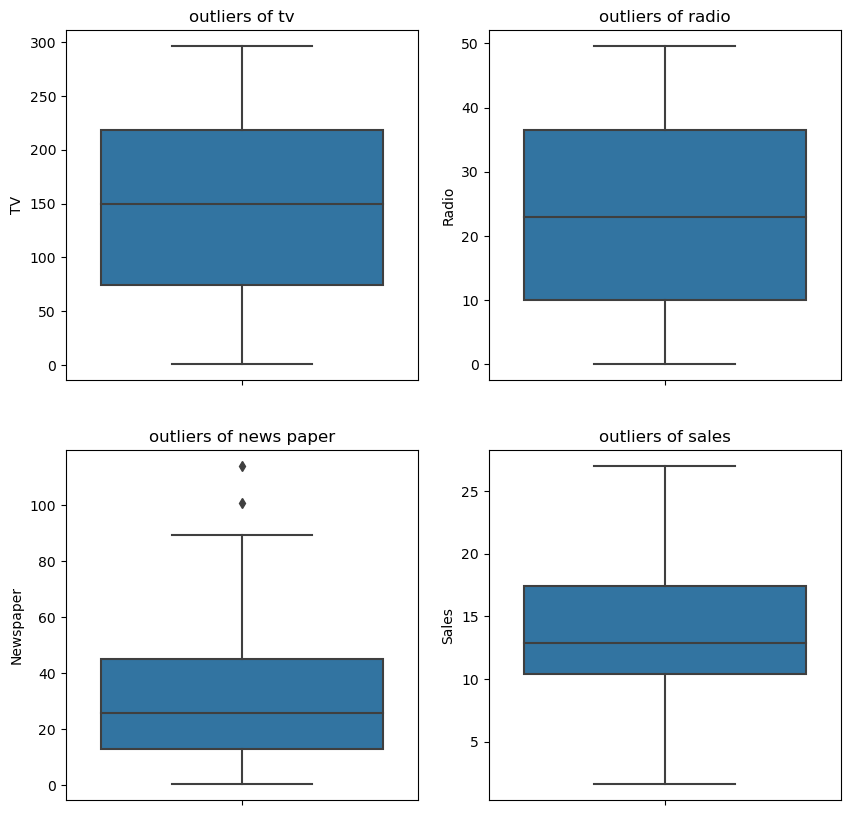

In [33]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot( y = df['TV'])
plt.title("outliers of tv")

plt.subplot(2,2,2)
sns.boxplot(y=df['Radio'])
plt.title('outliers of radio')

plt.subplot(2,2,3)
sns.boxplot(y=df['Newspaper'])
plt.title('outliers of news paper')

plt.subplot(2,2,4)
sns.boxplot(y=df['Sales'])
plt.title('outliers of sales')

plt.show()


### splitting data

In [37]:
features = ["TV", "Radio", "Newspaper"]
X = df[features]
target = "Sales"
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape 

((140, 3), (60, 3), (140,), (60,))

In [50]:
y_mean = round(y_train.mean(),2)
print("Mean Error: ", y_mean)
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline Error: ", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("MAE Baseline: ", mae_baseline)

Mean Error:  14.5
Baseline Error:  [14.5, 14.5, 14.5, 14.5, 14.5]
MAE Baseline:  4.1414285714285715


### creating model

In [52]:
lrs= LinearRegression().fit(X_train, y_train)
lrs

LinearRegression()

In [54]:
y_pred_training = lrs.predict(X_train)
print("Predicted values after model: ", y_pred_training[:5])
mae_pred_training = mean_absolute_error(y_train, y_pred_training)
print("MAE for training data after prediction: ", mae_pred_training)

Predicted values after model:  [17.39149783 15.19196153 11.41650701 11.20610472 16.39256165]
MAE for training data after prediction:  1.1581502948072533


In [55]:
y_pred_test = lrs.predict(X_test)
print("Predicted values after model: ", y_pred_test[:5])
mae_pred_test = mean_absolute_error(y_test, y_pred_test)
print("MAE for test data after prediction: ", mae_pred_test)

Predicted values after model:  [16.5653963  21.18822792 21.55107058 10.88923816 22.20231988]
MAE for test data after prediction:  1.5116692224549084


In [57]:
intercept = lrs.intercept_
intercept

2.7089490925159083

In [58]:
coefficient = lrs.coef_
coefficient

array([0.04405928, 0.1992875 , 0.00688245])

In [59]:
print(f"Sales = {intercept} + {coefficient[0]} * TV + {coefficient[1]} * Radio + {coefficient[2]} * Newspaper")

Sales = 2.7089490925159083 + 0.04405928095746521 * TV + 0.19928749689893946 * Radio + 0.006882452222275457 * Newspaper


In [61]:
print("Score of training data: ", lrs.score(X_train, y_train))
print("Score of test data: ", lrs.score(X_train, y_train))

Score of training data:  0.9055159502227753
Score of test data:  0.9055159502227753


Text(0.5, 1.0, 'Actual vs Predicted [Training Data]')

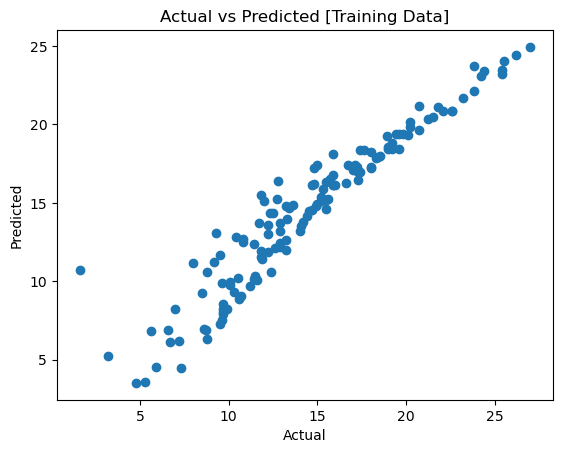

In [62]:
plt.scatter(y_train, y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Training Data]")

### checking predict values

In [65]:

predict = lrs.predict(X_test)
compar = pd.DataFrame({'actual':y_test, 'predicted': predict})
compar = compar.reset_index(drop = True)
compar[:10]

,actual,predicted
0,16.9,16.565396
1,22.4,21.188228
2,21.4,21.551071
3,7.3,10.889238
4,24.7,22.202320
5,12.6,13.355569
6,22.3,21.196925
7,8.4,7.350285
8,11.5,13.275471
9,14.9,15.124495
